## SpotiPy-Wrapped
#### By: Patrick D
### Usage Instructions:
1) Request your personal data from Spotify:  spotify.com -> my profile -> privacy -> request personal data -> wait a few days  
2) Unzip files into the input folder within this directory  
3) Change the 'directory' variable to point to your folder  
4) Run the notebook  
5) Change input variables of functions to get more specific information  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import time
import datetime

import cleaner
import helper
# Jupyter theming options: 
# from jupyterthemes import jtplot
# jtplot.style()

### Data Cleaning

In [2]:
# Import cleaner.py functions
from cleaner import *
# Import helper.py functions
from helper import *

In [3]:
# create listening history dataframe from desired directory within input folder
directory = 'input/01-17-22' # change this to '/input/your-directory-name'
his = read_history(directory)

# uncomment this if you want your dataframe output as a csv (change end of directory to your desired one)
# his.to_csv('~/Documents/Python/Spotify-Analysis/input/12-06-21/his.csv', index = False)

his.tail(5)

Files Included: 8 

Unique Values:
endTime       53299
artistName     1983
trackName      6626
msPlayed      17670
dtype: int64


,endTime,artistName,trackName,msPlayed
9995,2021-06-28 19:11,Maroon 5,In Your Pocket,2489
9996,2021-06-28 19:11,The Strokes,Why Are Sundays So Depressing,3150
9997,2021-06-28 19:11,Olivia Rodrigo,"jealousy, jealousy",173160
9998,2021-06-28 19:17,The Strokes,At The Door,310373
9999,2021-06-28 19:20,Majestic,Rasputin,186209


In [4]:
skipped = sort_skipped(his)
unskipped = sort_unskipped(his)

tracks = get_tracks(unskipped)
artists = get_artists(unskipped)

/home/patrick/Documents/Python/Spotify-Analysis/cleaner.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unskipped['endTime'] = pd.to_datetime(unskipped['endTime'])


### Graphs

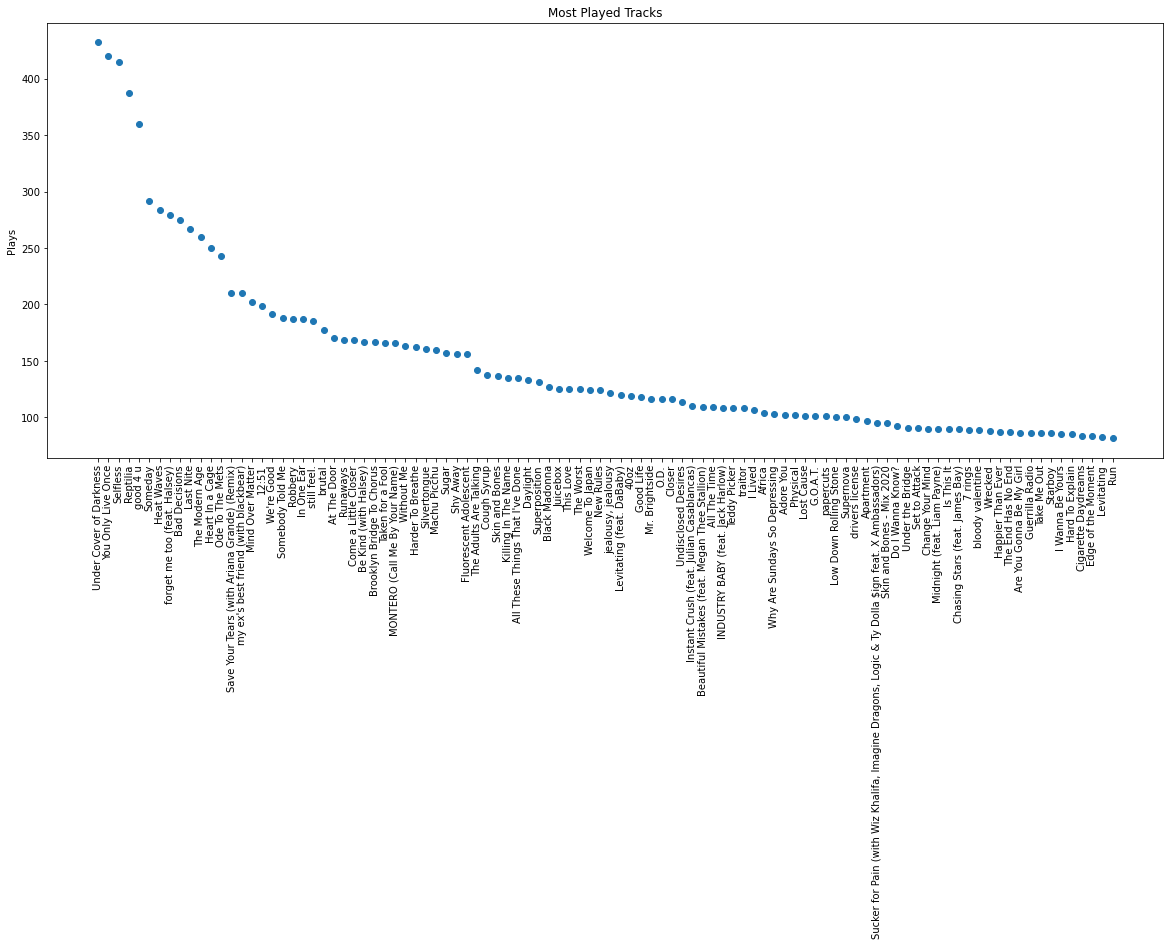

In [5]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Tracks')
plt.ylabel('Plays')
plt.show()

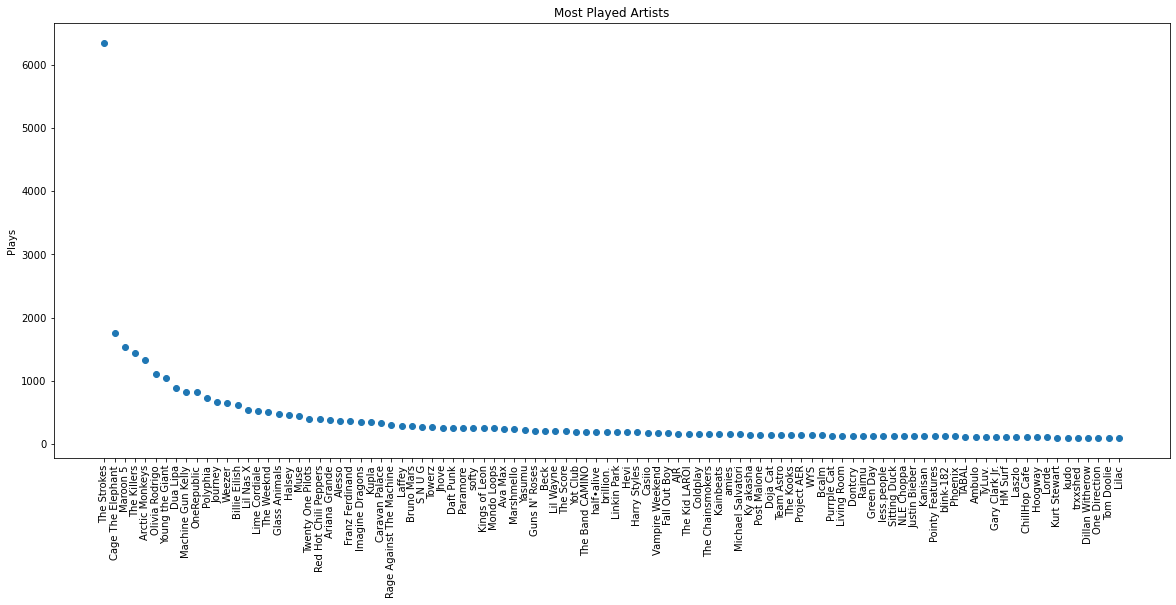

In [6]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Artists')
plt.ylabel('Plays')
plt.show()

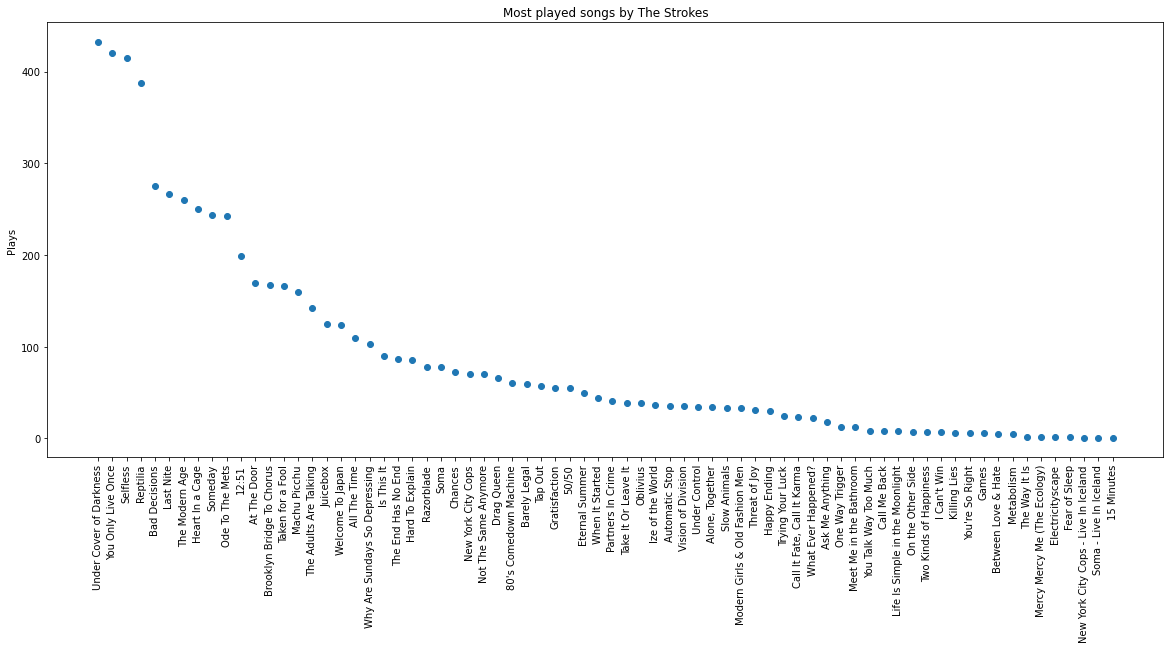

In [7]:
plotArtist("The Strokes", 100)

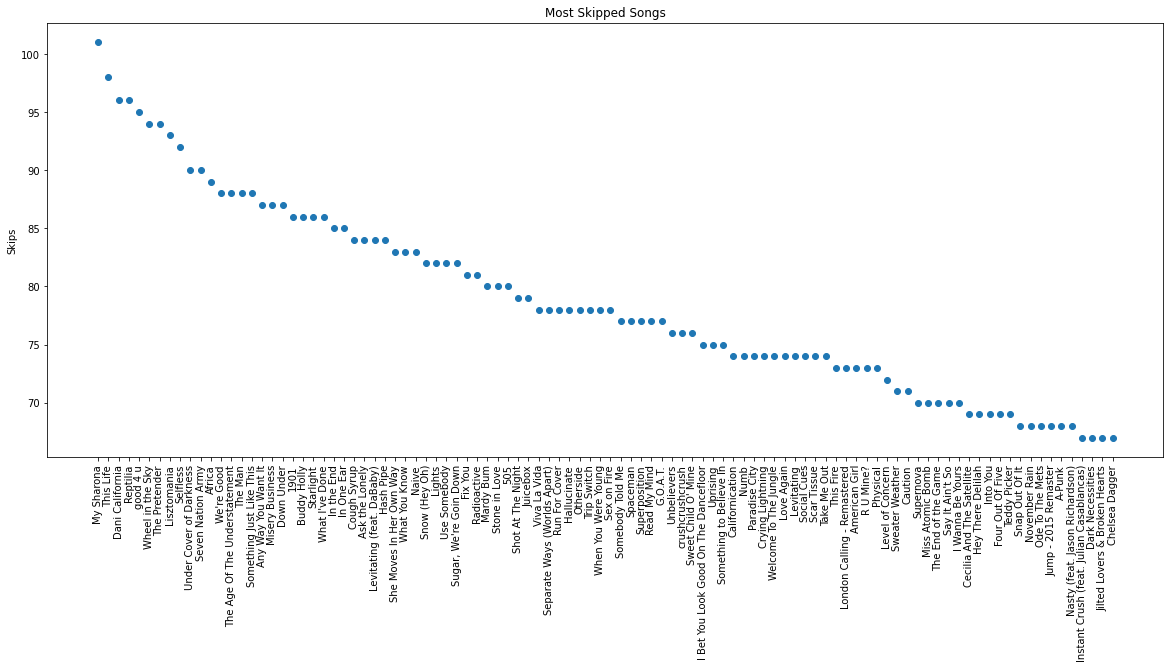

In [8]:
skipped_tracks = skipped['trackName'].value_counts()
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Songs')
plt.ylabel('Skips')
plt.show()

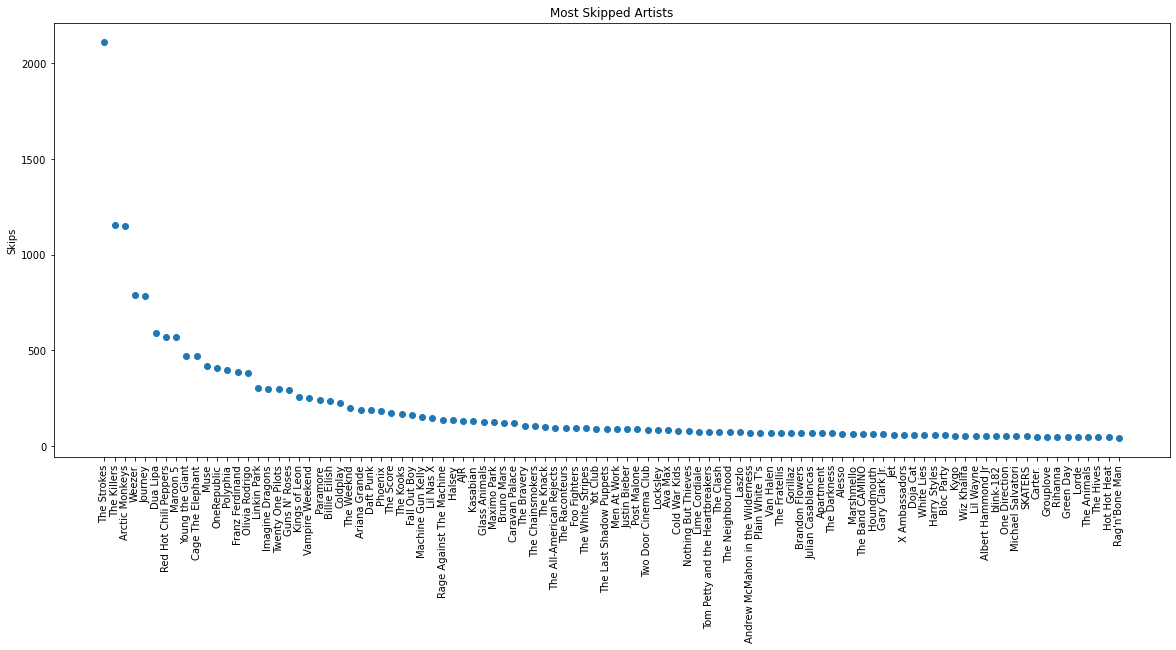

In [9]:
skipped_artists = skipped['artistName'].value_counts()
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Artists')
plt.ylabel('Skips')
plt.show()

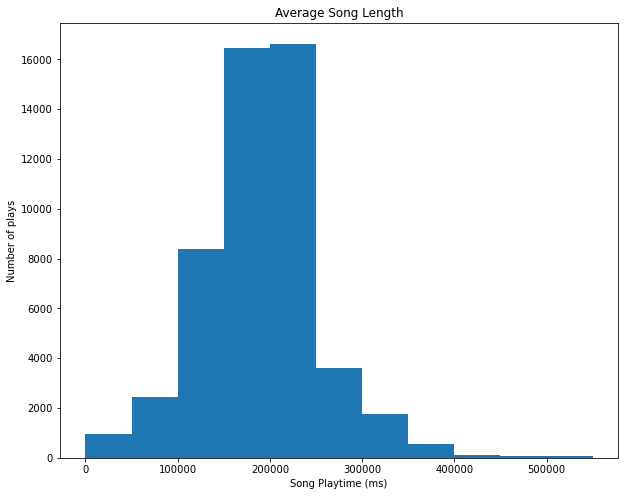

In [10]:
avgTrackLength()

### Other Information

In [11]:
# change n to find your n top songs
n = 10
print(topSongPlays(n))

Your top 10 songs: 
Song                       Plays
Under Cover of Darkness         432
You Only Live Once              420
Selfless                        415
Reptilia                        387
good 4 u                        360
Someday                         292
Heat Waves                      284
forget me too (feat. Halsey)    279
Bad Decisions                   275
Last Nite                       267
Name: trackName, dtype: int64


In [12]:
# Get playtime
t = playtime(unskipped)

Total minutes listened: 172802
Total hours listened: 2880.0333333333333


### Artist/Song specific information

In [13]:
artist = 'The Strokes' # change this to an artist of your choice (case sensitive)
temp = artistPlayCount(artist)

You have listened to The Strokes endTime       6341
artistName       1
trackName       72
msPlayed       873
dtype: int64 times.


In [14]:
track = "We're Good" # change this to a song name of your choice (case sensitive)
temp = songPlayCount(track)

You have listened to We're Good endTime       191
artistName      1
trackName       1
msPlayed       24
dtype: int64 times.


### Timeframe specific information

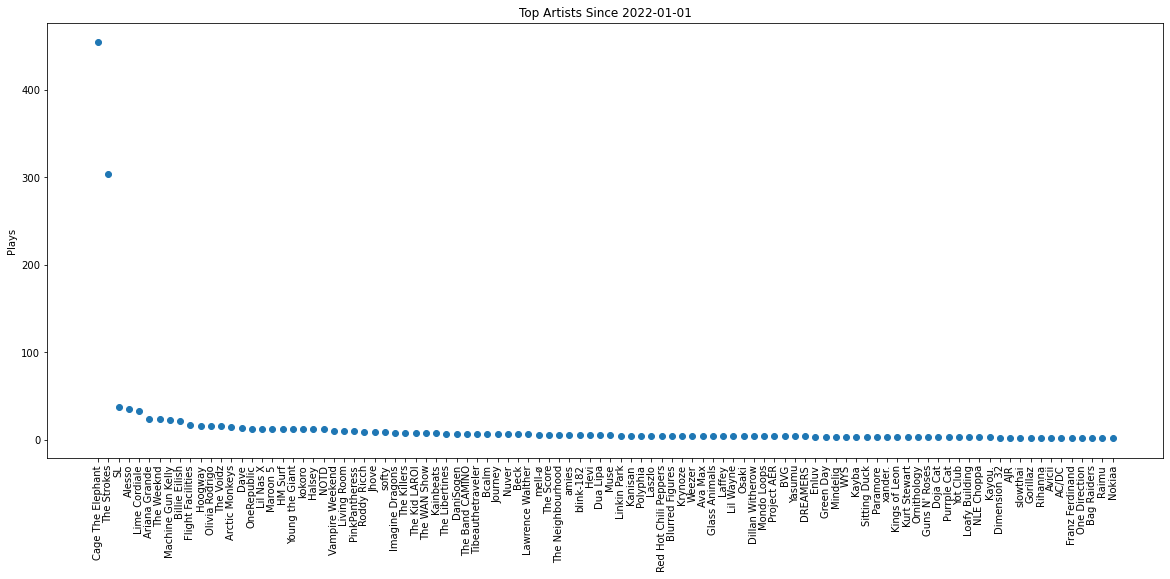

Cage The Elephant    454
The Strokes          304
SL                    37
Alesso                35
Lime Cordiale         33
Ariana Grande         23
The Weeknd            23
Machine Gun Kelly     22
Billie Eilish         21
Flight Facilities     17
Name: artistName, dtype: int64

In [15]:
# Plot top artists since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2022-01-01' # change this
topArtistsTimeframe(timeframe)

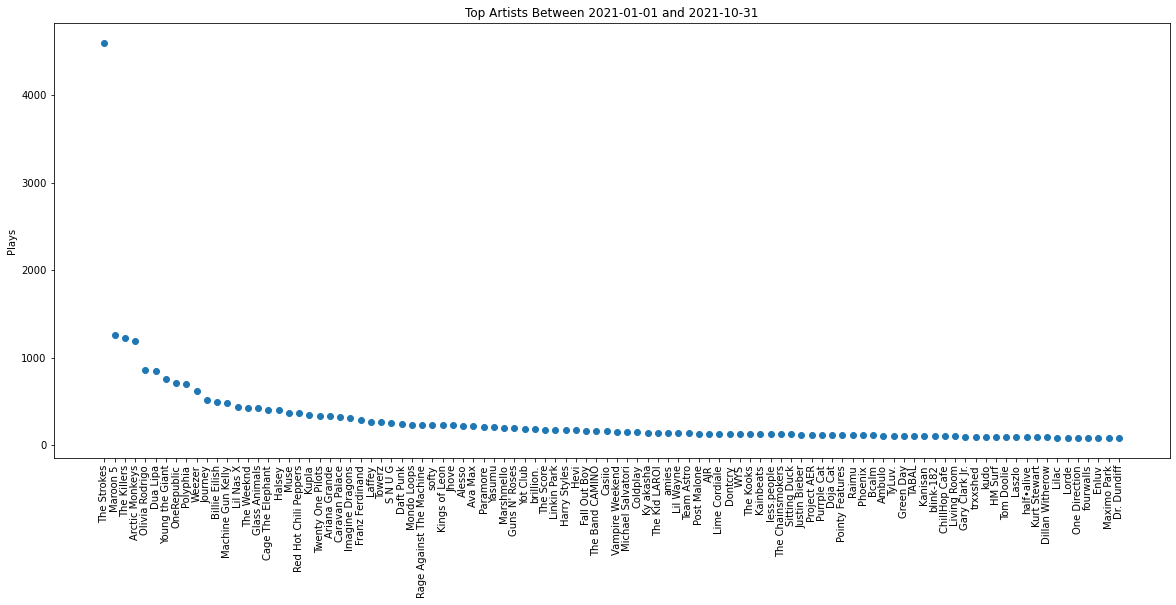

The Strokes        4595
Maroon 5           1256
The Killers        1229
Arctic Monkeys     1194
Olivia Rodrigo      865
Dua Lipa            845
Young the Giant     757
OneRepublic         707
Polyphia            702
Weezer              617
Name: artistName, dtype: int64

In [16]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2021-01-01' # change this - lower bound
timeframe_upper = '2021-10-31' # change this - upper bound
topArtistsTimeframeBounded(timeframe_lower, timeframe_upper)

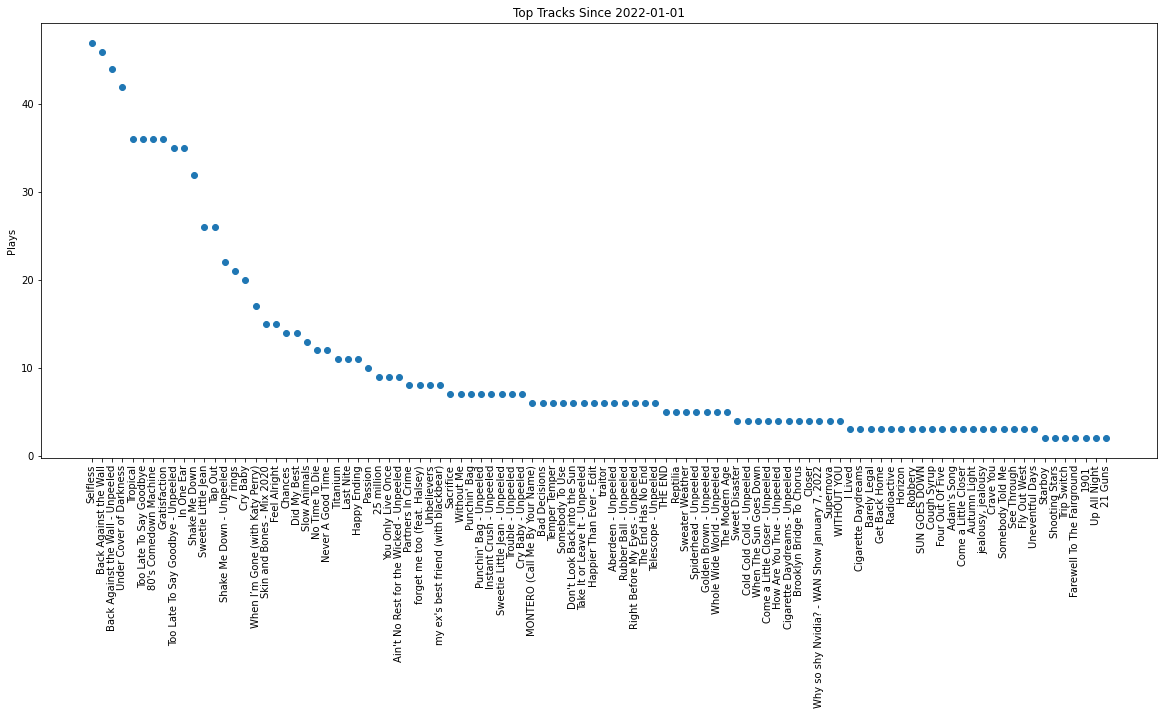

Selfless                              47
Back Against the Wall                 46
Back Against the Wall - Unpeeled      44
Under Cover of Darkness               42
Tropical                              36
Too Late To Say Goodbye               36
80's Comedown Machine                 36
Gratisfaction                         36
Too Late To Say Goodbye - Unpeeled    35
In One Ear                            35
Name: trackName, dtype: int64

In [17]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2022-01-01' # change this
topSongsTimeframe(timeframe)

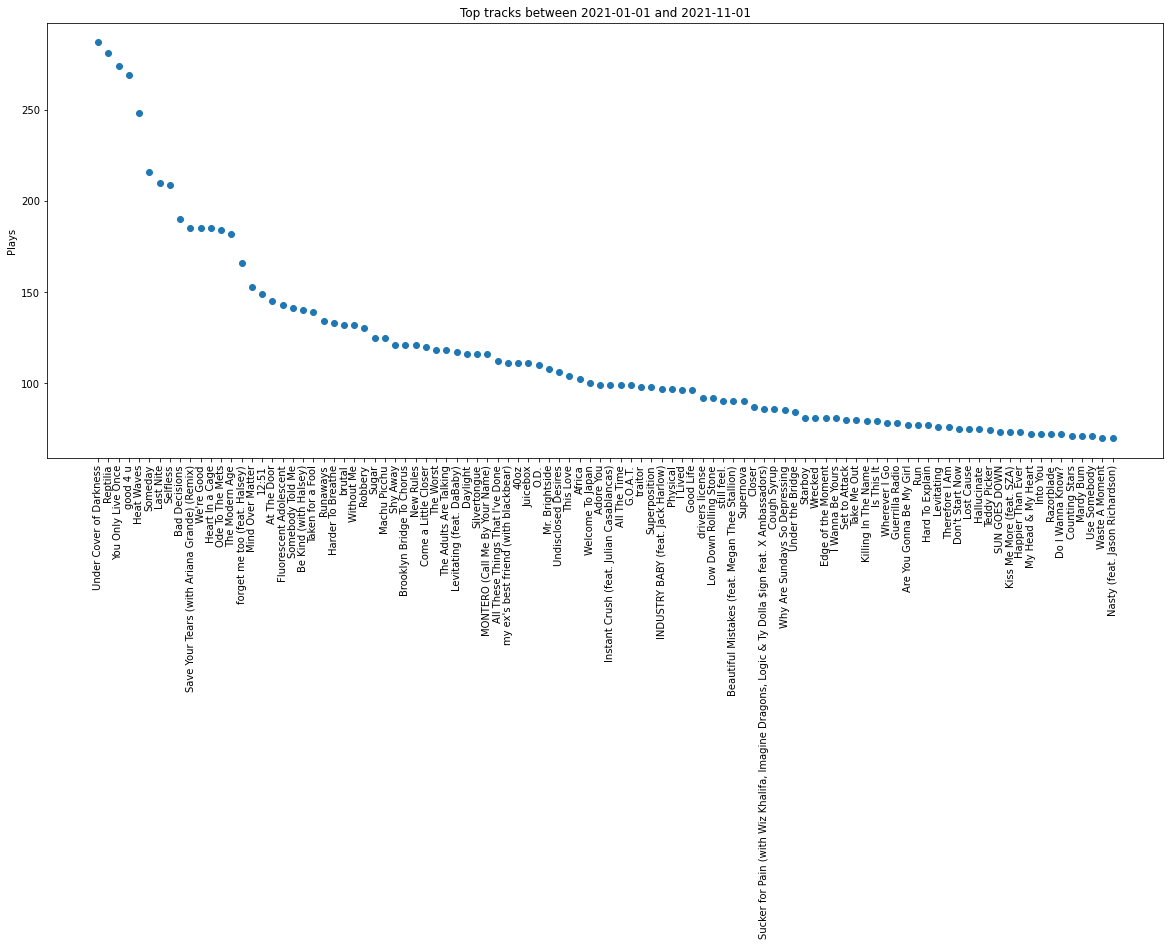

Under Cover of Darkness                         287
Reptilia                                        281
You Only Live Once                              274
good 4 u                                        269
Heat Waves                                      248
Someday                                         216
Last Nite                                       210
Selfless                                        209
Bad Decisions                                   190
Save Your Tears (with Ariana Grande) (Remix)    185
We're Good                                      185
Heart In a Cage                                 185
Ode To The Mets                                 184
The Modern Age                                  182
forget me too (feat. Halsey)                    166
Mind Over Matter                                153
12:51                                           149
At The Door                                     145
Fluorescent Adolescent                          143
Somebody Tol

In [18]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2021-01-01' # change this - lower bound
timeframe_upper = '2021-11-01' # change this - upper bound
topSongsTimeframeBounded(timeframe_lower, timeframe_upper)

In [19]:
# Get listening time for a given month
# inputs - month number and year
month = 12
year = 2021
listeningTimeMonth(month, year)

271.37040833333333

In [20]:
# Get listening time for a given artist in hours
# Change artist name
artist = 'The Strokes'
listeningTimeArtist(artist)

378.73848805555554